# Loss of Bee Colonies
## A review of information taken from the 2020 USDA survey 

## Problem Statement
### Honey bees are a vital part of our worldwide food chain as one of the main pollinators of fruits and vegetables.  This review of the survey data collected by the USDA in 2020 attempts to draw a connection between the use of pesticides and the urgent problem of colony collapse disorder (CCD).

## Proposed Solution
### In establishing evidence of the relationship between pesticide use and CCD, a compelling case could be made to discontinue the use of pesticides where feasible.

## Value
### The use of pesticides is extremely prevalent in both commercial farming and households.  Proving a connection between pesticides and the loss of honey bees, which may lead to large scale food shortages, will help to convince both individuals and governmental agencies that it is vital to limit their use.

## Final Thoughts and Next Steps
### While there are several contributors to CCD, the data shows that a very large amount of bee colonies in each state are affected by pesticides, with thousands showing affects.  These compelling observations make a strong case for limiting the use of pesticides in order to save the bees.

#### Import the required modules 

In [1]:
import requests
import numpy as np
import pandas as pd
import time
from pprint import pprint
from matplotlib import pyplot as plt
from scipy import stats

#### Extract the required data from the usda website using the parameters of honey bees, survey format and state level information.  Import in JSON format.

In [5]:
apikey = "15B191E7-B8C5-3AF1-9E28-97FD910F9119"
usda_url ="http://quickstats.nass.usda.gov/api/api_GET/?key=15B191E7-B8C5-3AF1-9E28-97FD910F9119&source_desc=SURVEY&commodity_desc=HONEY&agg_level_desc=STATE&param=short_desc"
usda_data= requests.get(usda_url).json()
usda_data

{'data': [{'zip_5': '',
   'state_alpha': 'AL',
   'county_ansi': '',
   'sector_desc': 'ANIMALS & PRODUCTS',
   'congr_district_code': '',
   'state_fips_code': '01',
   'reference_period_desc': 'MARKETING YEAR',
   'statisticcat_desc': 'PRICE RECEIVED',
   'end_code': '00',
   'begin_code': '00',
   'watershed_desc': '',
   'agg_level_desc': 'STATE',
   'asd_code': '',
   'region_desc': '',
   'Value': '5.43',
   'util_practice_desc': 'ALL UTILIZATION PRACTICES',
   'load_time': '2021-03-18 15:00:29',
   'state_ansi': '01',
   'country_name': 'UNITED STATES',
   'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
   'watershed_code': '00000000',
   'county_code': '',
   'county_name': '',
   'commodity_desc': 'HONEY',
   'domaincat_desc': 'NOT SPECIFIED',
   'location_desc': 'ALABAMA',
   'source_desc': 'SURVEY',
   'freq_desc': 'ANNUAL',
   'CV (%)': '',
   'year': 2020,
   'state_name': 'ALABAMA',
   'unit_desc': '$ / LB',
   'asd_desc': '',
   'short_desc': 'HONEY - PRICE RECEIVED,

#### Formatted the resulting dictionary into a list and put it into DataFrame format. 

In [9]:
new_usda_list=usda_data['data']
usda_df=pd.DataFrame(new_usda_list)
usda_df

,zip_5,state_alpha,county_ansi,sector_desc,congr_district_code,state_fips_code,reference_period_desc,statisticcat_desc,end_code,begin_code,...,year,state_name,unit_desc,asd_desc,short_desc,week_ending,domain_desc,country_code,group_desc,class_desc
0,,AL,,ANIMALS & PRODUCTS,,01,MARKETING YEAR,PRICE RECEIVED,00,00,...,2020,ALABAMA,$ / LB,,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",,TOTAL,9000,SPECIALTY,ALL CLASSES
1,,AL,,ANIMALS & PRODUCTS,,01,MARKETING YEAR,PRICE RECEIVED,00,00,...,2019,ALABAMA,$ / LB,,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",,TOTAL,9000,SPECIALTY,ALL CLASSES
2,,AL,,ANIMALS & PRODUCTS,,01,MARKETING YEAR,PRICE RECEIVED,00,00,...,2018,ALABAMA,$ / LB,,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",,TOTAL,9000,SPECIALTY,ALL CLASSES
3,,AZ,,ANIMALS & PRODUCTS,,04,MARKETING YEAR,PRICE RECEIVED,00,00,...,2020,ARIZONA,$ / LB,,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",,TOTAL,9000,SPECIALTY,ALL CLASSES
4,,AZ,,ANIMALS & PRODUCTS,,04,MARKETING YEAR,PRICE RECEIVED,00,00,...,2019,ARIZONA,$ / LB,,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",,TOTAL,9000,SPECIALTY,ALL CLASSES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21637,,OT,,ANIMALS & PRODUCTS,,98,OCT THRU DEC,INVENTORY,12,10,...,2016,OTHER STATES,PCT OF COLONIES,,"HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...",,TOTAL,9000,SPECIALTY,BEE COLONIES
21638,,OT,,ANIMALS & PRODUCTS,,98,JAN THRU MAR,INVENTORY,03,01,...,2015,OTHER STATES,PCT OF COLONIES,,"HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...",,TOTAL,9000,SPECIALTY,BEE COLONIES
21639,,OT,,ANIMALS & PRODUCTS,,98,APR THRU JUN,INVENTORY,06,04,...,2015,OTHER STATES,PCT OF COLONIES,,"HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...",,TOTAL,9000,SPECIALTY,BEE COLONIES
21640,,OT,,ANIMALS & PRODUCTS,,98,JUL THRU SEP,INVENTORY,09,07,...,2015,OTHER STATES,PCT OF COLONIES,,"HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...",,TOTAL,9000,SPECIALTY,BEE COLONIES


#### Extracted only the relevant eight columns from the full DataFrame.

In [10]:
usda_mod_df=usda_df[['reference_period_desc', 'source_desc', 'location_desc', 'sector_desc', 'year', 'Value', 'short_desc', 'statisticcat_desc']]
usda_mod_df

,reference_period_desc,source_desc,location_desc,sector_desc,year,Value,short_desc,statisticcat_desc
0,MARKETING YEAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,5.43,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",PRICE RECEIVED
1,MARKETING YEAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2019,3.38,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",PRICE RECEIVED
2,MARKETING YEAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2018,3.72,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",PRICE RECEIVED
3,MARKETING YEAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,2.18,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",PRICE RECEIVED
4,MARKETING YEAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2019,2.04,"HONEY - PRICE RECEIVED, MEASURED IN $ / LB",PRICE RECEIVED
...,...,...,...,...,...,...,...,...
21637,OCT THRU DEC,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2016,0,"HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...",INVENTORY
21638,JAN THRU MAR,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2015,2,"HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...",INVENTORY
21639,APR THRU JUN,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2015,18,"HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...",INVENTORY
21640,JUL THRU SEP,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2015,6,"HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...",INVENTORY


#### Created a DataFrame with only the information on honey bee colonies lost to colony collapse disorder (CCD).  As the original column 'Value' was in string format, we have changed it to float format for use in calculations below.

In [12]:
#Extracted data with CCD for 2020 year (90 rows, 8 columns)
usda_collapse_df = usda_mod_df[usda_mod_df['short_desc'].str.contains("COLONY COLLAPSE DISORDER")]
usda_collapse_2020 = usda_collapse_df[usda_collapse_df['year']==2020]
#Removed "," from value columns
usda_collapse_2020['Value']=usda_collapse_2020['Value'].str.replace(',','')
#converted value column in CCD 2020 from str to float
usda_collapse_2020['Value'] = usda_collapse_2020['Value'].astype(float)
usda_collapse_2020

<ipython-input-12-6cf34b283877>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usda_collapse_2020['Value']=usda_collapse_2020['Value'].str.replace(',','')
<ipython-input-12-6cf34b283877>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usda_collapse_2020['Value'] = usda_collapse_2020['Value'].astype(float)


,reference_period_desc,source_desc,location_desc,sector_desc,year,Value,short_desc,statisticcat_desc
17562,JAN THRU MAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,70.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17563,APR THRU JUN,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,410.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17567,JAN THRU MAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,4300.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17568,APR THRU JUN,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,170.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17572,JAN THRU MAR,SURVEY,ARKANSAS,ANIMALS & PRODUCTS,2020,390.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
...,...,...,...,...,...,...,...,...
17773,APR THRU JUN,SURVEY,WEST VIRGINIA,ANIMALS & PRODUCTS,2020,130.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17777,JAN THRU MAR,SURVEY,WISCONSIN,ANIMALS & PRODUCTS,2020,1600.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17778,APR THRU JUN,SURVEY,WISCONSIN,ANIMALS & PRODUCTS,2020,90.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
17782,JAN THRU MAR,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,1500.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"


#### Created a DataFrame with only the information on honey bee colonies affected by pesticides. As the original column 'Value' was in string format, we have changed it to float format for use in calculations below.

In [14]:
#Extracted data with pesticides for 2020 year (92 rows, 8 columns)
usda_pesticide_df = usda_mod_df[usda_mod_df['short_desc'].str.contains("AFFECTED BY PESTICIDES")]
usda_pesticide_2020 = usda_pesticide_df[usda_pesticide_df['year']==2020]
#converted value column from string to float
usda_pesticide_2020['Value']=pd.to_numeric(usda_pesticide_2020['Value'], errors='coerce')
usda_pesticide_2020

<ipython-input-14-3382efe17531>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usda_pesticide_2020['Value']=pd.to_numeric(usda_pesticide_2020['Value'], errors='coerce')


,reference_period_desc,source_desc,location_desc,sector_desc,year,Value,short_desc,statisticcat_desc
9322,JAN THRU MAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,0.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
9323,APR THRU JUN,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,7.7,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
9343,JAN THRU MAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
9344,APR THRU JUN,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,4.2,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
9364,JAN THRU MAR,SURVEY,ARKANSAS,ANIMALS & PRODUCTS,2020,2.6,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
...,...,...,...,...,...,...,...,...
10226,APR THRU JUN,SURVEY,WISCONSIN,ANIMALS & PRODUCTS,2020,25.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
10246,JAN THRU MAR,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
10247,APR THRU JUN,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,1.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
10267,JAN THRU MAR,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY


#### Created a DataFrame with only the information on honey bee colonies affected by pesticides. As the original column 'Value' was in string format, we have changed it to float format for use in calculations below.¶

In [17]:
#Extracted data with inventory for 2020 year (92 rows, 8 columns)
usda_inventory_df = usda_mod_df[usda_mod_df['short_desc'].str.contains("INVENTORY, MAX,")]
usda_inventory_2020 = usda_inventory_df[usda_inventory_df['year']==2020]
#Renamed value column in inventory dataframe to inventory_value. Inplace=true changes the original dataframe
usda_inventory_2020.rename(columns={'Value':'inventory_value'},inplace=True)
usda_inventory_2020

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,reference_period_desc,source_desc,location_desc,sector_desc,year,inventory_value,short_desc,statisticcat_desc
16596,JAN THRU MAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,"8,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"
16597,APR THRU JUN,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,"8,500","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"
16617,JAN THRU MAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,"32,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"
16618,APR THRU JUN,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,"26,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"
16638,JAN THRU MAR,SURVEY,ARKANSAS,ANIMALS & PRODUCTS,2020,"17,500","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"
...,...,...,...,...,...,...,...,...
17500,APR THRU JUN,SURVEY,WISCONSIN,ANIMALS & PRODUCTS,2020,"53,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"
17520,JAN THRU MAR,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,"17,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"
17521,APR THRU JUN,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,"24,000","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"
17541,JAN THRU MAR,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2020,"8,200","HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX"


#### Created a merged DataFrame containing both the pesticide and inventory value information for each survey.

In [19]:
inv_pest=pd.merge(usda_inventory_2020,usda_pesticide_2020,how='outer',on=['reference_period_desc','location_desc'])

#### Converted the 'inventory_value' column to a float for use in calculations

In [20]:
#Replaced "," with '' in inv_pest['inventory_value'] column. 
inv_pest['inventory_value']=inv_pest['inventory_value'].str.replace(',','')
inv_pest['inventory_value']
#converted to float to make sure all the values are on float datatype. 
inv_pest['inventory_value']=inv_pest['inventory_value'].apply(lambda x: float(x))
inv_pest

,reference_period_desc,source_desc_x,location_desc,sector_desc_x,year_x,inventory_value,short_desc_x,statisticcat_desc_x,source_desc_y,sector_desc_y,year_y,Value,short_desc_y,statisticcat_desc_y
0,JAN THRU MAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,8000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
1,APR THRU JUN,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,8500.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,7.7,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
2,JAN THRU MAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,32000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
3,APR THRU JUN,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,26000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,4.2,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
4,JAN THRU MAR,SURVEY,ARKANSAS,ANIMALS & PRODUCTS,2020,17500.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,2.6,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,APR THRU JUN,SURVEY,WISCONSIN,ANIMALS & PRODUCTS,2020,53000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,25.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
88,JAN THRU MAR,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,17000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
89,APR THRU JUN,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,24000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,1.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY
90,JAN THRU MAR,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2020,8200.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY


#### Changed the name of the 'Value' column in the collapse dataframe to reflect 'value_ccd' and merged with the inv_pest dataframe to create one dataframe containing all relevant values per survey.

In [21]:
#Renamed the column 'Value' to 'value_ccd' in order to be able to merge this df into the one with the inventory and pesticide numbers
usda_collapse_2020_new=usda_collapse_2020.rename(columns={'Value': 'value_ccd' })
#Merge to get all value data in one place and grouped by state and time period
usda_total=pd.merge(inv_pest,usda_collapse_2020_new,how='outer',on=['reference_period_desc','location_desc'])
usda_total

,reference_period_desc,source_desc_x,location_desc,sector_desc_x,year_x,inventory_value,short_desc_x,statisticcat_desc_x,source_desc_y,sector_desc_y,year_y,Value,short_desc_y,statisticcat_desc_y,source_desc,sector_desc,year,value_ccd,short_desc,statisticcat_desc
0,JAN THRU MAR,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,8000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,SURVEY,ANIMALS & PRODUCTS,2020.0,70.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
1,APR THRU JUN,SURVEY,ALABAMA,ANIMALS & PRODUCTS,2020,8500.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,7.7,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,SURVEY,ANIMALS & PRODUCTS,2020.0,410.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
2,JAN THRU MAR,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,32000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,SURVEY,ANIMALS & PRODUCTS,2020.0,4300.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
3,APR THRU JUN,SURVEY,ARIZONA,ANIMALS & PRODUCTS,2020,26000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,4.2,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,SURVEY,ANIMALS & PRODUCTS,2020.0,170.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
4,JAN THRU MAR,SURVEY,ARKANSAS,ANIMALS & PRODUCTS,2020,17500.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,2.6,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,SURVEY,ANIMALS & PRODUCTS,2020.0,390.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,APR THRU JUN,SURVEY,WISCONSIN,ANIMALS & PRODUCTS,2020,53000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,25.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,SURVEY,ANIMALS & PRODUCTS,2020.0,90.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
88,JAN THRU MAR,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,17000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,SURVEY,ANIMALS & PRODUCTS,2020.0,1500.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
89,APR THRU JUN,SURVEY,WYOMING,ANIMALS & PRODUCTS,2020,24000.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,1.1,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,SURVEY,ANIMALS & PRODUCTS,2020.0,500.0,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...","LOSS, COLONY COLLAPSE DISORDER"
90,JAN THRU MAR,SURVEY,OTHER STATES,ANIMALS & PRODUCTS,2020,8200.0,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","INVENTORY, MAX",SURVEY,ANIMALS & PRODUCTS,2020,0.0,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY,NaN,NaN,NaN,NaN,NaN,NaN


#### Calculated the percentage of colonies affected by CCD

In [22]:
#Calculated the percentage of colonies lost to CCD
ccd_perc=round((usda_total['value_ccd']/usda_total['inventory_value'])*100, 2)
ccd_perc

0      0.88
1      4.82
2     13.44
3      0.65
4      2.23
      ...  
87     0.17
88     8.82
89     2.08
90      NaN
91      NaN
Length: 92, dtype: float64

#### Created a final survey level dataframe comparing percentages of colonies lost to CCD vs colonies affected by pesticides

In [24]:
#Created a copy of df containing only percent of colonies affected by pesticides
usda_total_comp=usda_total[['location_desc', 'reference_period_desc', 'Value']]
usda_total_compare=usda_total_comp.copy()
#added the percentage lost to colony collapse
usda_total_compare['ccd_perc']=ccd_perc
#Changed column names to appropriately reflect the values
usda_total_compare.rename(columns={'Value': '%_Colonies_Affected_by_Pesticides', 'ccd_perc': "%_Colonies_Lost_to_Colony_Collapse_Disorder"}, inplace=True)
#Replace NaN values in "OTHER STATES" with 0
usda_total_compare["%_Colonies_Lost_to_Colony_Collapse_Disorder"] = usda_total_compare["%_Colonies_Lost_to_Colony_Collapse_Disorder"].fillna(0)
usda_total_compare['%_Colonies_Affected_by_Pesticides'] = usda_total_compare["%_Colonies_Affected_by_Pesticides"].fillna(0)
usda_total_compare

,location_desc,reference_period_desc,%_Colonies_Affected_by_Pesticides,%_Colonies_Lost_to_Colony_Collapse_Disorder
0,ALABAMA,JAN THRU MAR,0.1,0.88
1,ALABAMA,APR THRU JUN,7.7,4.82
2,ARIZONA,JAN THRU MAR,0.0,13.44
3,ARIZONA,APR THRU JUN,4.2,0.65
4,ARKANSAS,JAN THRU MAR,2.6,2.23
...,...,...,...,...
87,WISCONSIN,APR THRU JUN,25.1,0.17
88,WYOMING,JAN THRU MAR,0.0,8.82
89,WYOMING,APR THRU JUN,1.1,2.08
90,OTHER STATES,JAN THRU MAR,0.0,0.00


#### Grouped the data at the state level

In [25]:
grp_usda_total_compare=usda_total_compare.groupby(usda_total_compare['location_desc']).sum()
grp_usda_total_compare

,%_Colonies_Affected_by_Pesticides,%_Colonies_Lost_to_Colony_Collapse_Disorder
location_desc,,
ALABAMA,7.8,5.70
ARIZONA,4.2,14.09
ARKANSAS,27.2,7.52
CALIFORNIA,10.7,1.38
COLORADO,0.4,5.03
CONNECTICUT,0.0,0.24
FLORIDA,10.8,9.71
GEORGIA,3.3,9.33
HAWAII,0.0,1.62


#### Broke the data down into two equal groups so that they can be easily readable in scatter graphs

In [26]:
grp1_usda_total_compare=grp_usda_total_compare.head(23)
grp1_usda_total_compare
grp2_usda_total_compare=grp_usda_total_compare.tail(23)
grp2_usda_total_compare

,%_Colonies_Affected_by_Pesticides,%_Colonies_Lost_to_Colony_Collapse_Disorder
location_desc,,
MONTANA,0.0,10.63
NEBRASKA,10.9,10.61
NEW JERSEY,0.2,0.91
NEW MEXICO,0.4,0.00
NEW YORK,0.2,2.65
NORTH CAROLINA,0.6,9.42
NORTH DAKOTA,3.0,16.30
OHIO,5.9,20.29
OKLAHOMA,1.4,0.56


#### More colonies appear to be affected by pesticides than lost to colony collapse disorder.

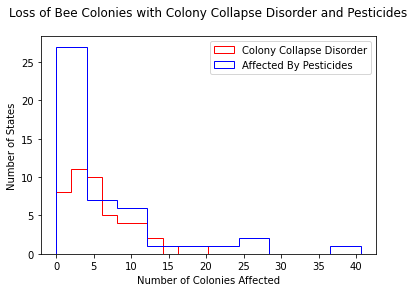

In [27]:
#Step histogram of both colony collapse disorder and pesticides percentages
fig, ax = plt.subplots()
ax.hist(grp_usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], label="Colony Collapse Disorder", color='red', histtype="step")
ax.hist(grp_usda_total_compare['%_Colonies_Affected_by_Pesticides'], label="Affected By Pesticides", color='blue', histtype="step")
ax.set_title("Loss of Bee Colonies with Colony Collapse Disorder and Pesticides", pad=20)
ax.set_xlabel("Number of Colonies Affected")
ax.set_ylabel("Number of States")
ax.legend()
plt.savefig("bee_hist")
plt.show()


#### A view of survey results at the individual state level. 

<ipython-input-28-b046bb6af75a>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp1_usda_total_compare.index, rotation=90)


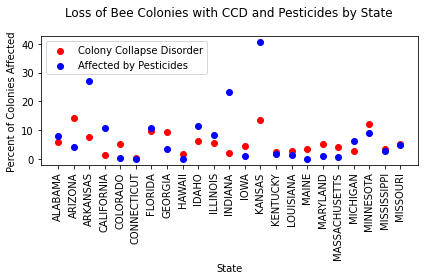

In [28]:
#Created a scatterplot to reflect percentages of colony collapse disorder and colonies affected by pesticides
fig, ax = plt.subplots()
ax.scatter(grp1_usda_total_compare.index, grp1_usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], color="red", label="Colony Collapse Disorder")
ax.scatter(grp1_usda_total_compare.index, grp1_usda_total_compare['%_Colonies_Affected_by_Pesticides'], color="blue", label="Affected by Pesticides")
ax.legend()
ax.set_title("Loss of Bee Colonies with CCD and Pesticides by State", pad=20)
ax.set_xticklabels(grp1_usda_total_compare.index, rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
plt.tight_layout()
plt.savefig("grp1_scatter")
plt.show()

<ipython-input-29-ff91cd7e9ff8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp2_usda_total_compare.index, rotation=90)


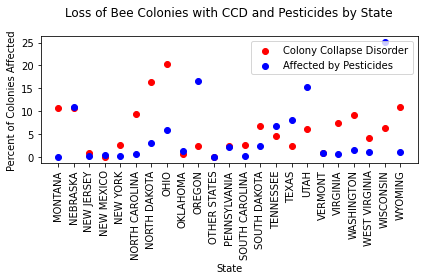

In [29]:
#Created a scatterplot to reflect percentages of colony collapse disorder and colonies affected by pesticides
fig, ax = plt.subplots()
ax.scatter(grp2_usda_total_compare.index, grp2_usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], color="red", label="Colony Collapse Disorder")
ax.scatter(grp2_usda_total_compare.index, grp2_usda_total_compare['%_Colonies_Affected_by_Pesticides'], color="blue", label="Affected by Pesticides")
ax.legend()
#Pad is spacing between title and plot
ax.set_title("Loss of Bee Colonies with CCD and Pesticides by State", pad=20)
ax.set_xticklabels(grp2_usda_total_compare.index, rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
plt.tight_layout()
plt.savefig("grp2_scatter")
plt.show()

#### A calculation of the correlation coefficient shows little correlation.

In [30]:
np.corrcoef(usda_total_compare['%_Colonies_Affected_by_Pesticides'], usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'] )

array([[ 1.        , -0.08112837],
       [-0.08112837,  1.        ]])

In [31]:
usda_total_compare.describe()

,%_Colonies_Affected_by_Pesticides,%_Colonies_Lost_to_Colony_Collapse_Disorder
count,92.000000,92.000000
mean,3.052174,2.875000
std,5.809721,3.539015
min,0.000000,0.000000
25%,0.000000,0.680000
50%,0.500000,1.580000
75%,3.025000,3.575000
max,32.800000,19.500000
